In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv("datasets/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [48]:
df.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [49]:
df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

<AxesSubplot: ylabel='fixed acidity'>

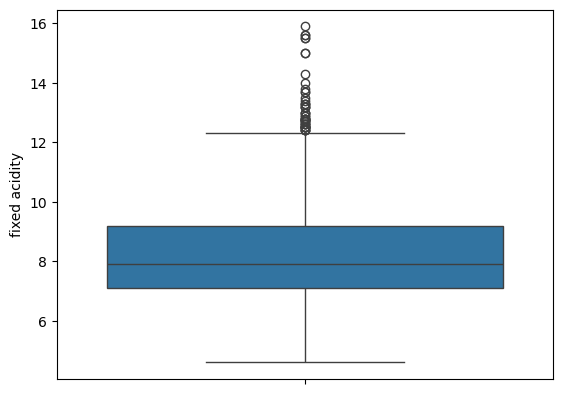

In [50]:
sns.boxplot(df['fixed acidity'])

In [51]:
Q1 = df['fixed acidity'].quantile(0.25)
Q3 = df['fixed acidity'].quantile(0.75)
IQR  = Q3 - Q1
upper_limit = Q3 + 1.5*IQR

In [52]:
median = df['fixed acidity'].median()

In [53]:
df['fixed acidity'] = np.where(df['fixed acidity'] > upper_limit, median, df['fixed acidity'])

<AxesSubplot: ylabel='fixed acidity'>

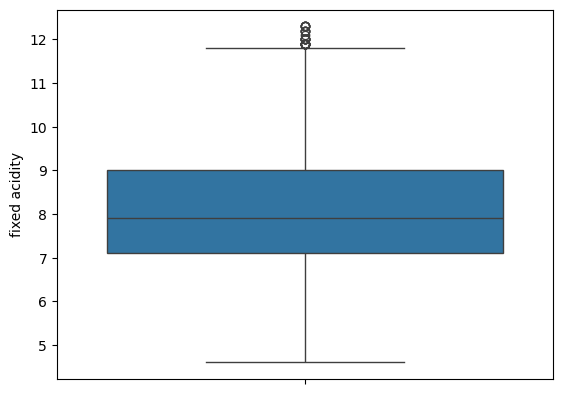

In [54]:
sns.boxplot(df['fixed acidity'])

<AxesSubplot: ylabel='volatile acidity'>

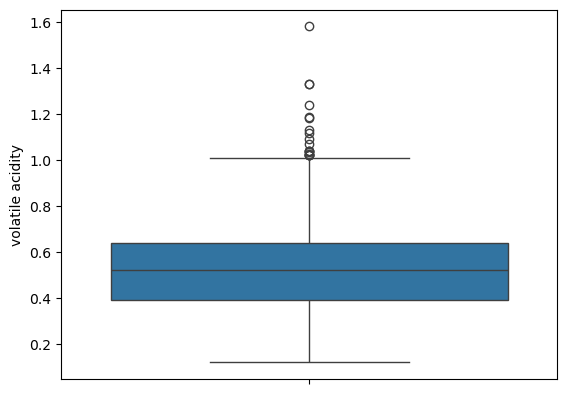

In [55]:
sns.boxplot(df['volatile acidity'])

There seems to lot of outlier in each columns lets automate this for each column .

In [56]:
def outlier_remover(df: pd.DataFrame ) -> pd.DataFrame:
    cols = [col for col in df.columns if df[col].dtype!='O']
    print(cols)
    for col in cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR  = Q3 - Q1
            upper_limit = Q3 + 1.5*IQR
            lower_limit = Q1 - 1.5*IQR
            median = df[col].median()
            df[col] = np.where((df[col] > upper_limit) | (df[col] < lower_limit), median, df[col])
    return df
    

In [57]:
df = outlier_remover(df)
df.head()

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


<AxesSubplot: ylabel='volatile acidity'>

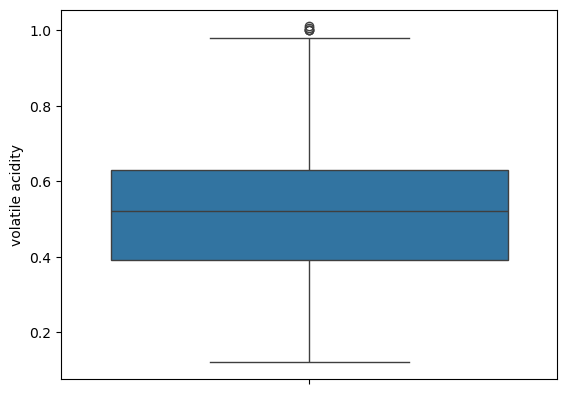

In [58]:
sns.boxplot(df['volatile acidity'])

In [59]:
x = df.drop(columns=['quality'])
y = df.quality

In [60]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [64]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         4.0       0.00      0.00      0.00        11
         5.0       0.77      0.83      0.80       135
         6.0       0.75      0.78      0.76       147
         7.0       0.59      0.48      0.53        27

    accuracy                           0.75       320
   macro avg       0.53      0.52      0.52       320
weighted avg       0.72      0.75      0.73       320



In [65]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train,y_train = smote.fit_resample(x_train, y_train)

In [66]:
y_train.value_counts()

quality
5.0    546
6.0    546
7.0    546
4.0    546
Name: count, dtype: int64

In [68]:
resampledRFC = RandomForestClassifier()
resampledRFC.fit(x_train, y_train)
resampled_ypred = resampledRFC.predict(x_test)

In [69]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, resampled_ypred))

              precision    recall  f1-score   support

         4.0       0.17      0.09      0.12        11
         5.0       0.75      0.75      0.75       135
         6.0       0.72      0.63      0.67       147
         7.0       0.41      0.78      0.54        27

    accuracy                           0.68       320
   macro avg       0.51      0.56      0.52       320
weighted avg       0.69      0.68      0.68       320

